In [6]:
import sys
import os
from skimage import io
from matplotlib import pyplot as plt
import cv2

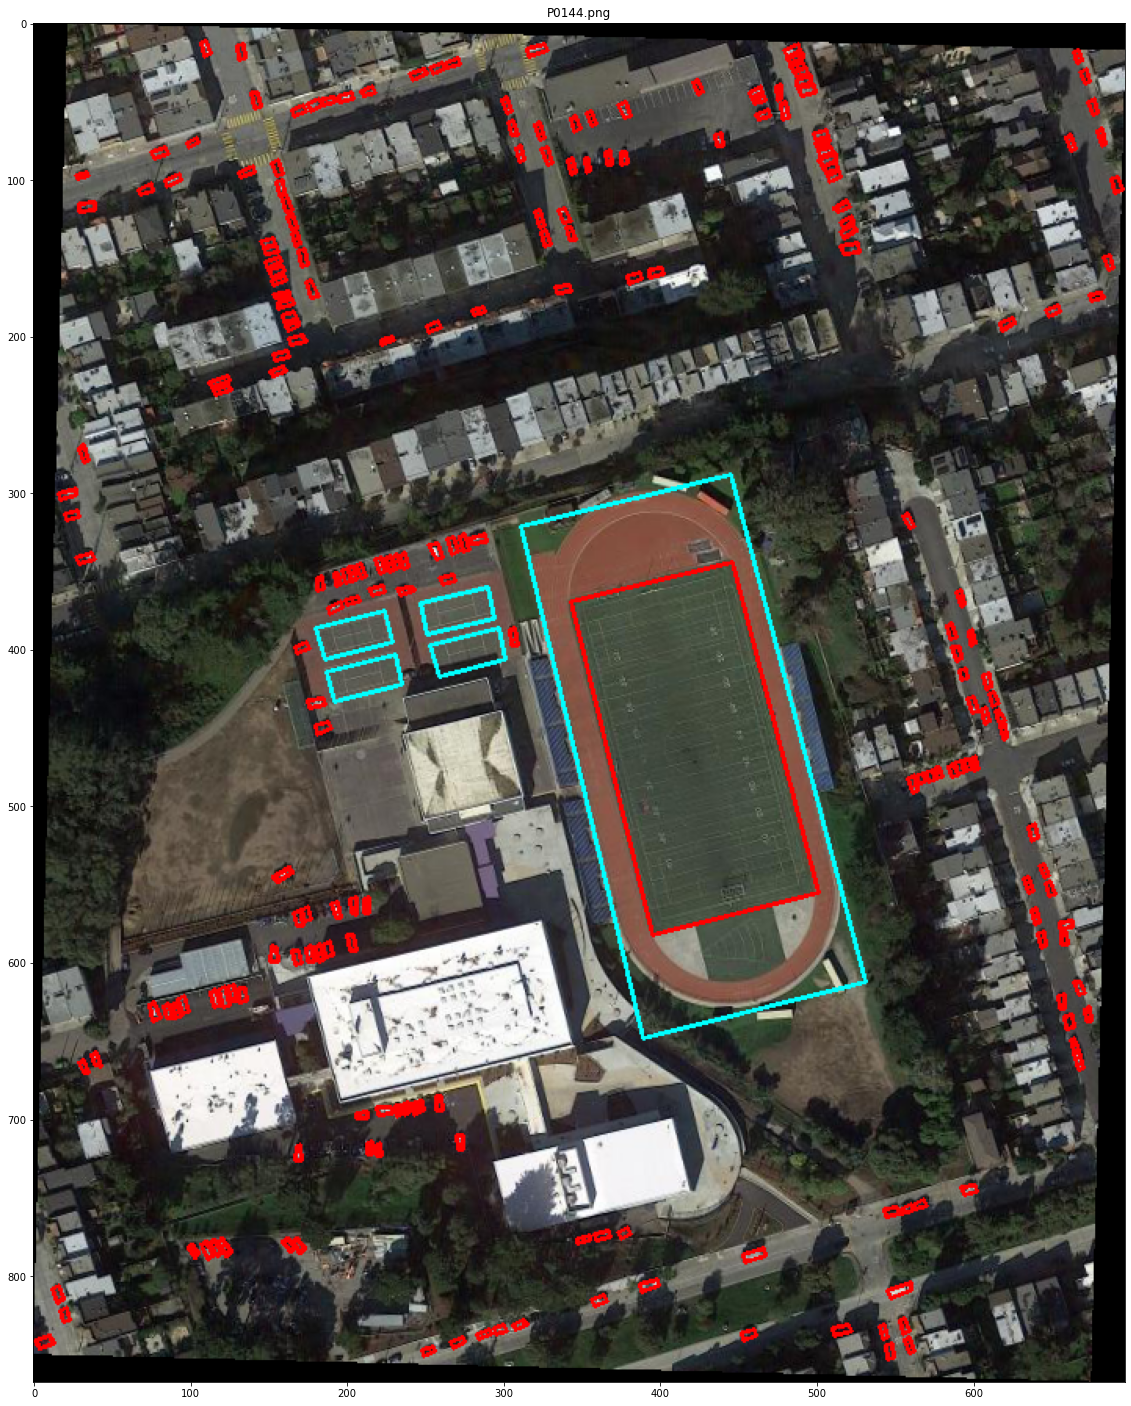

In [48]:
annot_path = 'data/train/bboxes' #Path to directory of annotations
images_path = 'data/train/images' #Path to directory of images
image_no = 69 #Entry to display (may not correspond to filename)

image_list = os.listdir(images_path)
image_file = image_list[image_no]
image = io.imread(os.path.join(images_path, image_file))
annot_file = image_file.replace('.png','.txt')
annot = open(os.path.join(annot_path, annot_file))

for line in annot:
    if not line[0].isdigit():
        continue
    entries = line.split()
    p1 = int(float(entries[0])), int(float(entries[1]))
    p2 = int(float(entries[2])), int(float(entries[3]))
    p3 = int(float(entries[4])), int(float(entries[5]))
    p4 = int(float(entries[6])), int(float(entries[7]))
    
    if entries[9] == '1': # Boxes labelled "hard" will be shown in red, others in cyan
        color = (255, 0, 0)
    else:
        color = (0, 255, 255)
    
    cv2.line(image, p1, p2, color,2)
    cv2.line(image, p2, p3, color,2)
    cv2.line(image, p3, p4, color,2)
    cv2.line(image, p4, p1, color,2)

plt.figure(figsize = (25,25))
plt.title(image_file)
plt.imshow(image)